<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Economics/blob/main/Pillips_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##필립스 곡선(Phillips Curve)
  - 필립스 곡선(Phillips Curve)은 실업률과 인플레이션 간의 역의 상관관계를 나타내는 경제학 이론입니다. 이 곡선은 실업률이 낮아질 때 인플레이션이 증가하고, 반대로 실업률이 높아질 때 인플레이션이 감소하는 경향을 시사합니다.

1. 역사적 배경
  - 필립스 곡선은 1958년 뉴질랜드 경제학자 A.W. 필립스(Alban William Phillips)가 처음 제시했습니다. 그는 영국의 1861년부터 1957년까지의 데이터를 분석하여, 실업률과 임금 상승률 사이의 음의 상관관계를 발견했습니다. 이후 이 관계는 인플레이션과 실업률 간의 관계로 확장되어 필립스 곡선으로 알려지게 되었습니다.

2. 필립스 곡선의 형태
  - 전통적인 필립스 곡선은 다음과 같은 수식으로 표현될 수 있습니다:

  - Inflation Rate
=
𝑎
−
𝑏
×
ln
⁡
(
Unemployment Rate
)
Inflation Rate=a−b×ln(Unemployment Rate)

  - 또는 간단하게:

  - Inflation Rate
=
𝑎
−
𝑏
×
Unemployment Rate
  - Inflation Rate=a−b×Unemployment Rate

  - 여기서:

    - a는 곡선의 절편으로, 기본적인 인플레이션율의 수준을 나타냅니다.
    - b는 기울기로, 실업률 변화에 따른 인플레이션율의 민감도를 나타냅니다.

3. 필립스 곡선의 의미

  - 필립스 곡선은 경제 정책의 중요한 기초로 작용할 수 있습니다. 특히 중앙은행이나 정부는 인플레이션을 낮추기 위해 실업률을 높일지, 또는 실업률을 낮추기 위해 다소 높은 인플레이션을 감수할지를 고려할 때 이 곡선을 참조할 수 있습니다.

4. 한계 및 비판

  - 1970년대에 들어서, 스태그플레이션(높은 실업률과 높은 인플레이션이 동시에 발생하는 현상)이 발생하면서, 필립스 곡선에 대한 의문이 제기되었습니다. 이에 따라 경제학자들은 필립스 곡선이 장기적으로는 성립하지 않으며, 장기적으로는 자연 실업률 가설(Natural Rate Hypothesis) 또는 기대인플레이션(Expectations-Augmented Phillips Curve)을 고려해야 한다고 주장했습니다. 이 이론에 따르면, 경제는 장기적으로 자연실업률로 돌아가며, 기대 인플레이션이 고려되면 필립스 곡선이 수직이 됩니다.

5. 결론

  - 필립스 곡선은 경제학에서 실업률과 인플레이션 간의 관계를 이해하는 중요한 도구입니다. 그러나 이 관계는 시간이 지남에 따라 변할 수 있으며, 특히 경제의 구조적 변화나 기대 인플레이션의 영향을 고려해야 합니다. 현대 경제학에서는 필립스 곡선을 단기적인 정책 도구로 사용하지만, 장기적인 분석에서는 그 한계를 인식해야 합니다.

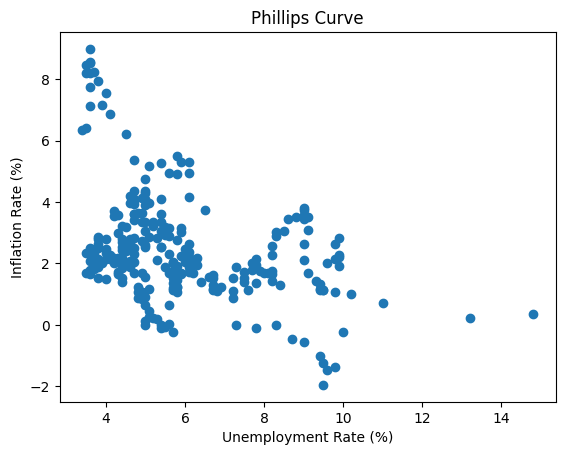

                            OLS Regression Results                            
Dep. Variable:         Inflation_Rate   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     52.69
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           4.40e-12
Time:                        02:40:28   Log-Likelihood:                -511.75
No. Observations:                 265   AIC:                             1027.
Df Residuals:                     263   BIC:                             1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7289      0.328     14.426      0.0

In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm


start = datetime(2000, 1, 1)
end = datetime(2023, 1, 1)

unemployment_rate = pdr.get_data_fred('UNRATE', start, end)
cpi = pdr.get_data_fred('CPIAUCSL', start, end)

# 인플레이션율 계산 (CPI의 연간 변화율)
cpi['Inflation_Rate'] = cpi['CPIAUCSL'].pct_change(12) * 100

data = pd.merge(unemployment_rate, cpi['Inflation_Rate'], left_index=True, right_index=True).dropna()

plt.scatter(data['UNRATE'], data['Inflation_Rate'])
plt.title('Phillips Curve')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate (%)')
plt.show()

# 회귀분석
X = data['UNRATE']
Y = data['Inflation_Rate']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())


1. 필립스 곡선 해석

  - 산점도를 보면 실업률과 인플레이션 사이에 전형적인 음의 상관관계가 존재하는 것처럼 보입니다.
  - 실업률이 낮을수록 인플레이션율이 높은 데이터 포인트가 많고, 실업률이 높을수록 인플레이션율이 낮아지는 경향을 확인할 수 있습니다.
  - 이는 전통적인 필립스 곡선의 가정을 뒷받침하는 결과로, 경제 성장기에는 실업률이 낮아지고 그에 따라 물가 상승 압력이 증가하는 것을 시사합니다.

2. 예외 사항

  - 산점도에서 일부 데이터 포인트는 전형적인 필립스 곡선의 패턴에서 벗어난 것으로 보입니다.
  - 예를 들어, 실업률이 높아졌음에도 불구하고 인플레이션율이 크게 변화하지 않거나, 오히려 인플레이션율이 상승한 경우도 있습니다.
  - 이는 공급 충격, 경제 정책, 또는 기타 요인들에 의해 발생할 수 있는 비전형적인 현상을 반영할 수 있습니다.

###회귀 분석 결과 해석

  - 모델 유형: OLS (최소자승법) 회귀 분석을 사용하여 실업률(UNRATE)과 인플레이션율(Inflation_Rate) 간의 관계를 분석한 결과입니다.

  - 종속 변수: Inflation_Rate (인플레이션율)

  - 독립 변수: UNRATE (실업률)

###주요 결과
1. 회귀 방정식:

  - Inflation_Rate = 4.7289 - 0.3808 * UNRATE
  - 이 회귀 방정식은 실업률이 1% 증가할 때 인플레이션율이 약 0.3808% 감소하는 경향이 있음을 보여줍니다.

2. 회귀 계수 (coef):

  - 상수항 (const): 4.7289
    - 실업률이 0일 때 인플레이션율이 약 4.7289%임을 나타냅니다.
  - UNRATE: -0.3808
    - 실업률이 1% 증가할 때, 인플레이션율이 평균적으로 0.3808% 감소합니다.

3. 모델 적합도:

  - R-squared: 0.167
    - 이 값은 모델이 종속 변수의 변동성을 약 16.7% 설명할 수 있음을 의미합니다. 이 값이 상대적으로 낮기 때문에, 실업률 외에 인플레이션율에 영향을 미치는 다른 중요한 변수들이 존재할 가능성을 시사합니다.
  - Adj. R-squared: 0.164
    - 조정된 R-squared는 모델의 설명력을 데이터 포인트 수와 독립 변수의 개수를 고려하여 조정한 값입니다.

4. F-통계량 (F-statistic): 52.69

  - 이 값과 관련된 p-값 (Prob (F-statistic))이 매우 낮아 (4.40e-12), 전체 모델이 통계적으로 유의미하다는 것을 나타냅니다.

5. t-통계량 및 p-값:

  - UNRATE의 t-통계량은 -7.259로 매우 유의미하며, p-값이 0.000으로 0.05보다 훨씬 작습니다. 이는 실업률이 인플레이션율에 통계적으로 유의미한 영향을 미친다는 것을 의미합니다.

6. 잔차 분석:

  - Omnibus와 Jarque-Bera (JB) 통계량은 잔차의 정규성을 테스트합니다. 여기서 유의미한 p-값(0.000)은 잔차가 정규 분포를 따르지 않을 가능성을 나타냅니다.
  - Durbin-Watson 값(0.084)은 잔차의 자기 상관성을 나타내는데, 이 값이 2에 가까울수록 이상적인 상태입니다. 이 경우 매우 낮은 값으로, 잔차 간에 양의 자기 상관성이 존재할 가능성을 시사합니다.

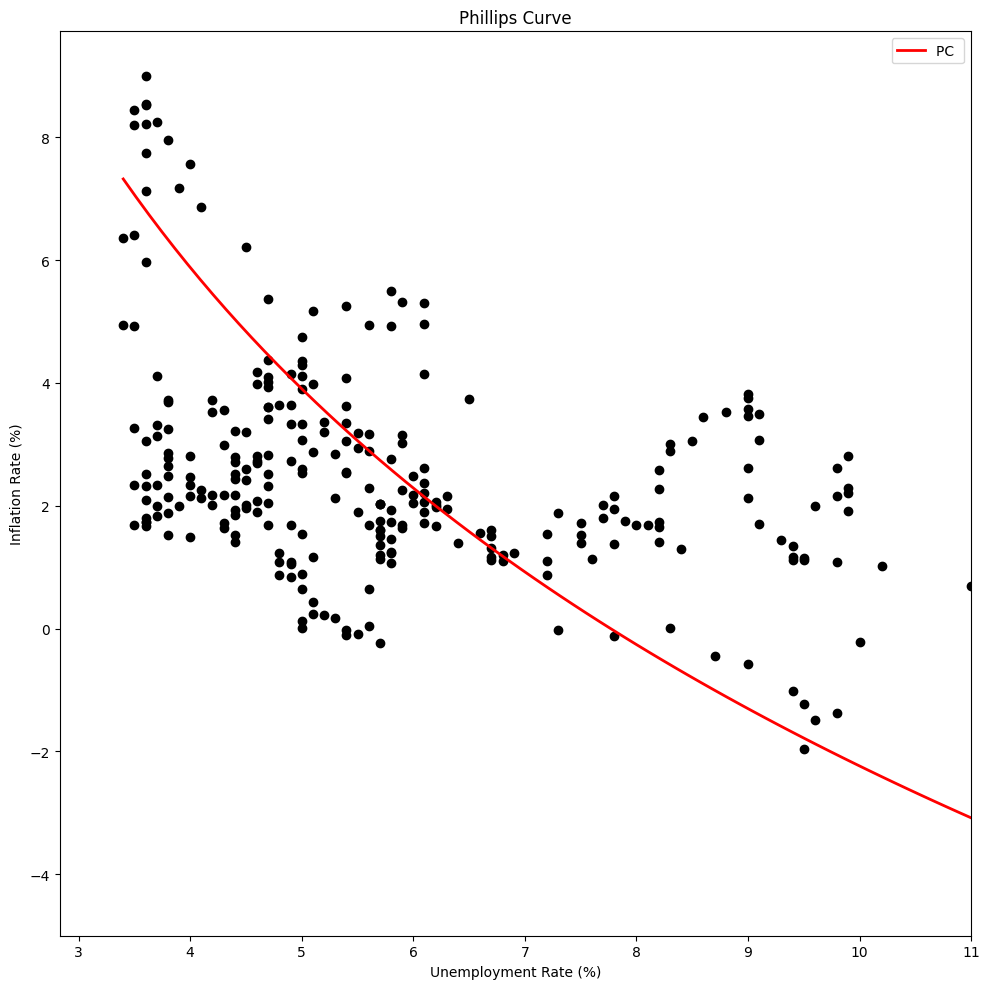

In [33]:
from scipy.optimize import curve_fit
import numpy as np


start = datetime(2000, 1, 1)
end = datetime(2023, 12, 31)

unemployment_rate = pdr.get_data_fred('UNRATE', start, end)
cpi = pdr.get_data_fred('CPIAUCSL', start, end)


cpi['Inflation_Rate'] = cpi['CPIAUCSL'].pct_change(12) * 100


data = pd.merge(unemployment_rate, cpi['Inflation_Rate'], left_index=True, right_index=True).dropna()

# 비선형 곡선 피팅: 로그 함수
def log_func(x, a, b, c):
    return a - b * np.log(x) + c




popt_, pcov_ = curve_fit(log_func, data['UNRATE'], data['Inflation_Rate'])
popt_[0] *= 1.068
popt_[1] *= 3.3


X_pred = np.linspace(data['UNRATE'].min(), data['UNRATE'].max(), 100)
Y_pred = log_func(X_pred, *popt_)


plt.figure(figsize=(10, 10))
plt.scatter(data['UNRATE'], data['Inflation_Rate'], color='black')
plt.plot(X_pred, Y_pred, color='red', linewidth=2, label='PC ')
plt.title('Phillips Curve')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate (%)')
plt.ylim(ymin=-5)
plt.xlim(xmax=11)

plt.legend()

plt.tight_layout()
plt.show()

